In [ ]:
import pandas as pd
df_parquet = pd.read_excel('bank-full.xlsx')
df_parquet.to_parquet('bank-full.parquet',index = False)

In [1]:
import pandas as pd

df = pd.read_parquet('bank-full.parquet')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df[df['balance'] == 1500]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3196,52,technician,divorced,primary,no,1500,no,no,unknown,15,may,148,3,-1,0,unknown,no
11829,52,blue-collar,married,secondary,no,1500,no,yes,unknown,20,jun,109,3,-1,0,unknown,no
18245,41,blue-collar,married,primary,no,1500,yes,no,cellular,31,jul,101,6,-1,0,unknown,no
19656,33,technician,single,secondary,no,1500,no,no,cellular,7,aug,133,4,-1,0,unknown,no
44405,59,unknown,married,unknown,no,1500,no,no,cellular,4,aug,248,1,182,1,other,no
45186,59,unknown,married,unknown,no,1500,no,no,cellular,16,nov,280,1,104,2,failure,no


In [2]:
for col in df.columns:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col} has {unknown_count} unknown values')


job has 288 unknown values
education has 1857 unknown values
contact has 13020 unknown values
poutcome has 36959 unknown values


In [2]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [52]:
df[df['age'] == 'unknown']
df['job'].value_counts()
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

# Preprocessing

In [2]:
df = df.drop('poutcome', axis = 1)
df = df.drop('contact',axis= 1)

In [3]:
df['job'] = df['job'].replace('unknown', df['job'].mode().iloc[0])
df['job'].value_counts()

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

In [22]:
df_job = df['job']
df_y = df['y']
# saving the dataframe
df_plot = pd.concat([df_job, df_y], axis=1)
df_plot.to_csv('job_without_unknown.csv',index= False)

In [49]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [4]:
df['education'] = df.apply(lambda row: df[df['job'] == row['job']]['education'].mode().iloc[0] if row['education'] == 'unknown' else row['education'], axis=1)
df['education'].value_counts()

education
secondary    24657
tertiary     13658
primary       6896
Name: count, dtype: int64

In [20]:
df_edu = df['education']
df_y = df['y']
# saving the dataframe
df_plot2 = pd.concat([df_edu, df_y], axis=1)
df_plot2.to_csv('job_without_unknown.csv',index= False)

In [5]:
print('before', df.shape)

df = df.drop_duplicates()
print('after',df.shape)


before (45211, 15)
after (45211, 15)


# EDA

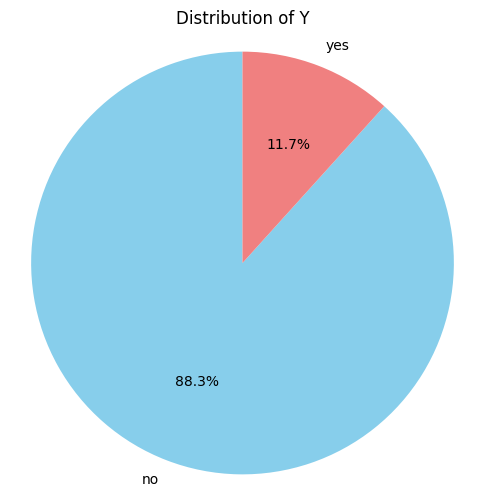

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
# Suppose 'y' has "yes" and "no"
y_counts = df['y'].value_counts()

# Plotting
plt.figure(figsize=(6,6))
plt.pie(
    y_counts,
    labels=y_counts.index,
    autopct='%1.1f%%',  # show percentages
    startangle=90,      # rotate start of pie chart
    colors=['skyblue', 'lightcoral']  # optional: custom colors
)
plt.title('Distribution of Y')
plt.axis('equal')  # Equal aspect ratio makes pie chart a circle
plt.show()



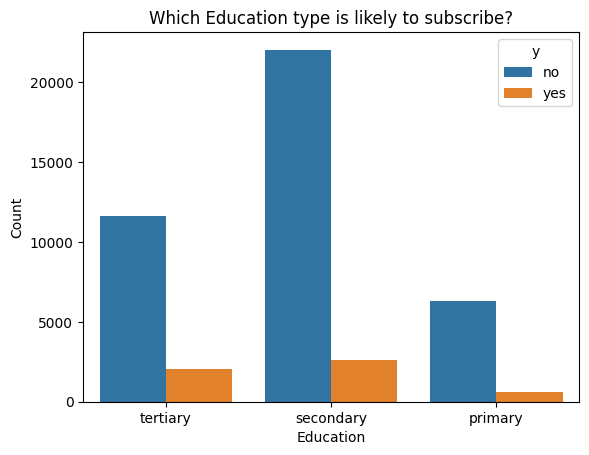

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='education', hue='y', data=df)
plt.title("Which Education type is likely to subscribe?")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

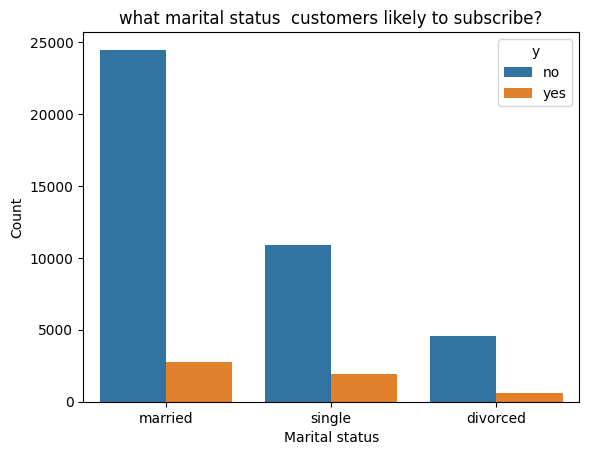

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='marital', hue='y', data=df)
plt.title("what marital status  customers likely to subscribe?")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.show()


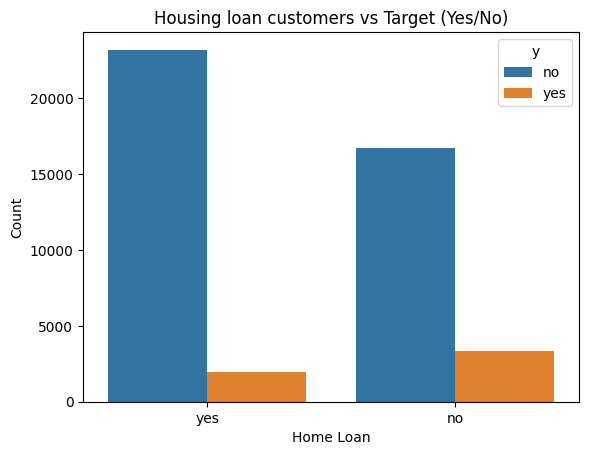

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='housing', hue='y', data=df)
plt.title("Housing loan customers vs Target (Yes/No)")
plt.xlabel("Home Loan")
plt.ylabel("Count")
plt.show()


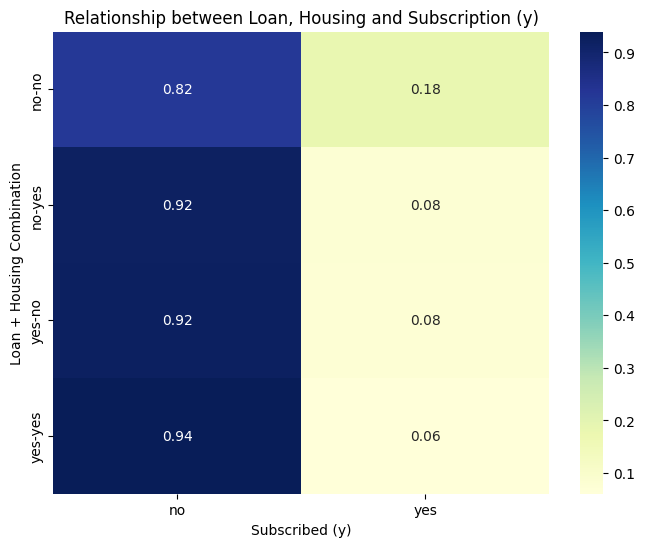

In [ ]:
cross_tab = pd.crosstab([df['loan'], df['housing']], df['y'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Relationship between Loan, Housing and Subscription (y)')
plt.ylabel('Loan + Housing Combination')
plt.xlabel('Subscribed (y)')
plt.show()

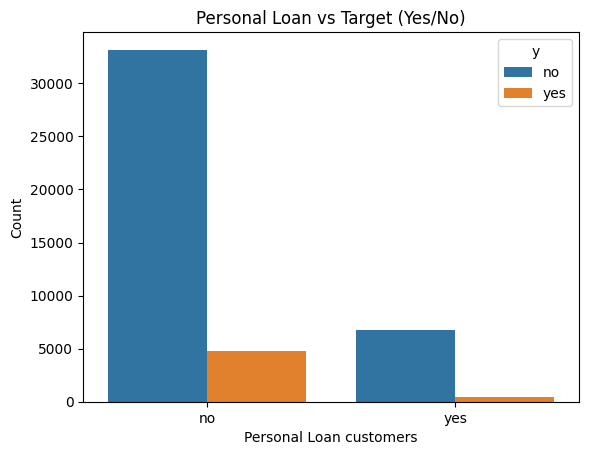

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan', hue='y', data=df)
plt.title("Personal Loan vs Target (Yes/No)")
plt.xlabel("Personal Loan customers")
plt.ylabel("Count")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15980\334136243.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_counts = df_yes.groupby(['month', 'day']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

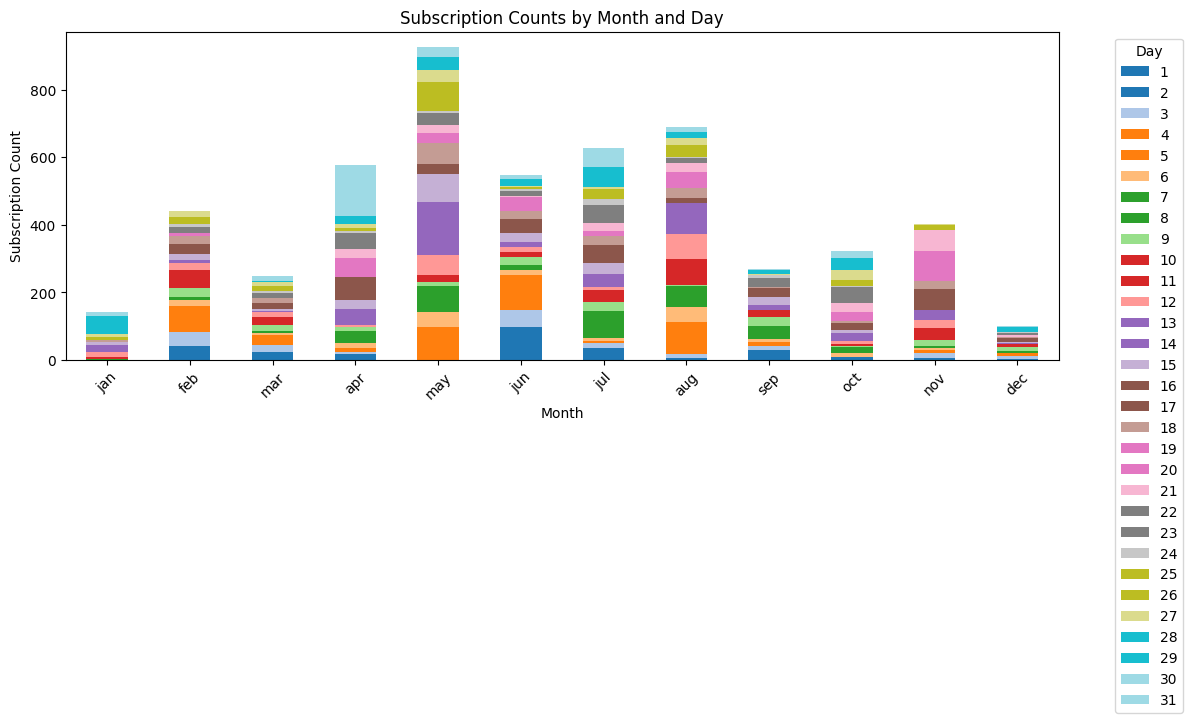

In [26]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Filter the data to only include 'yes' subscriptions without modifying the original DataFrame
df_yes = df[df['y'] == 'yes']

# Group by month and day to get subscription counts
subscription_counts = df_yes.groupby(['month', 'day']).size().unstack(fill_value=0)

# Plot the counts
plt.figure(figsize=(10, 6))
subscription_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Subscription Counts by Month and Day')
plt.xlabel('Month')
plt.ylabel('Subscription Count')
plt.xticks(rotation=45)
plt.legend(title="Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

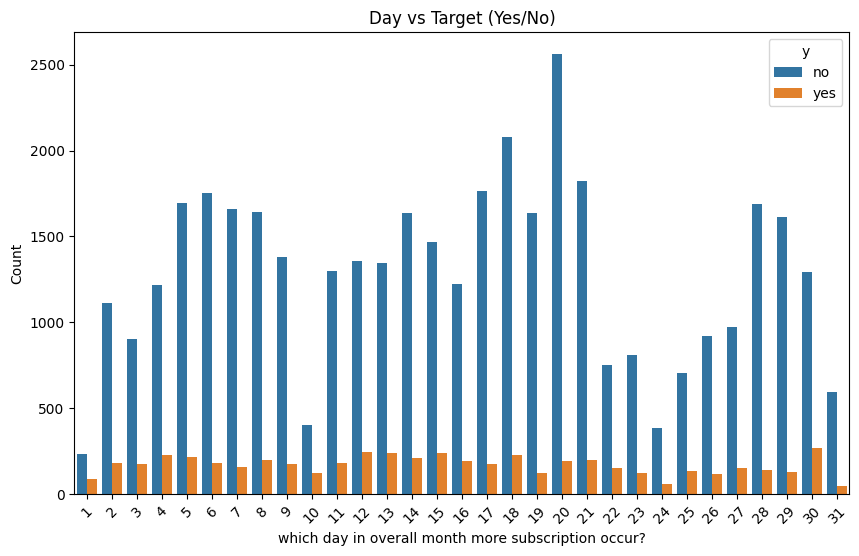

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Day vs Target (Yes/No)")
plt.xlabel("which day in overall month more subscription occur?")
plt.ylabel("Count")
plt.show()


<Axes: ylabel='age'>

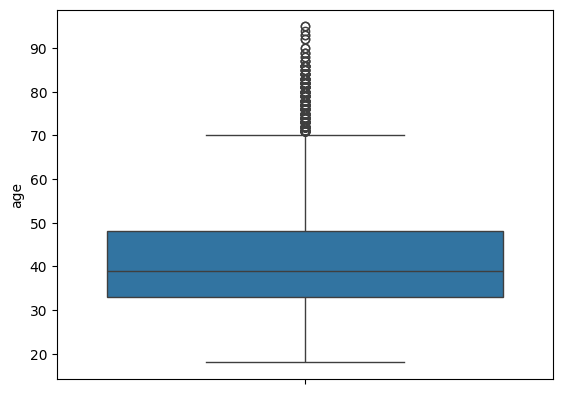

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df['age'])


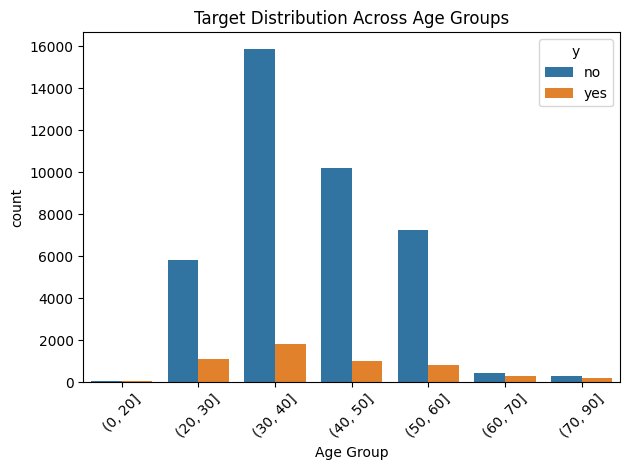

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age bins and plot directly without modifying df
age_bins = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 90])

sns.countplot(x=age_bins, hue='y', data=df)
plt.title("Target Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


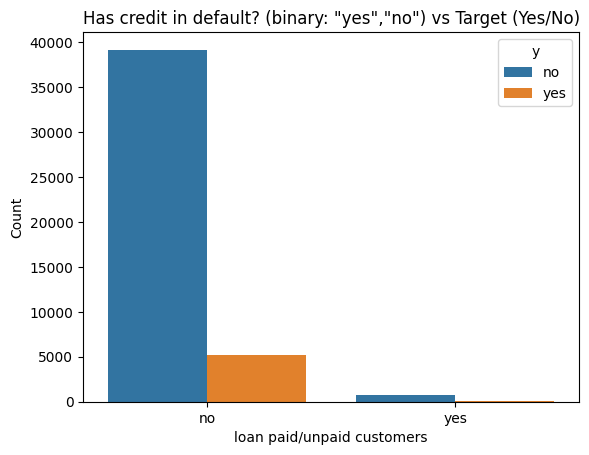

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default', hue='y', data=df)
plt.title('Has credit in default? (binary: "yes","no") vs Target (Yes/No)')
plt.xlabel("loan paid/unpaid customers")
plt.ylabel("Count")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='contact', hue='y', data=df)
plt.title("Contact type vs Target (Yes/No)")
plt.xlabel("what kind of contact?")
plt.ylabel("Count")
plt.show()


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


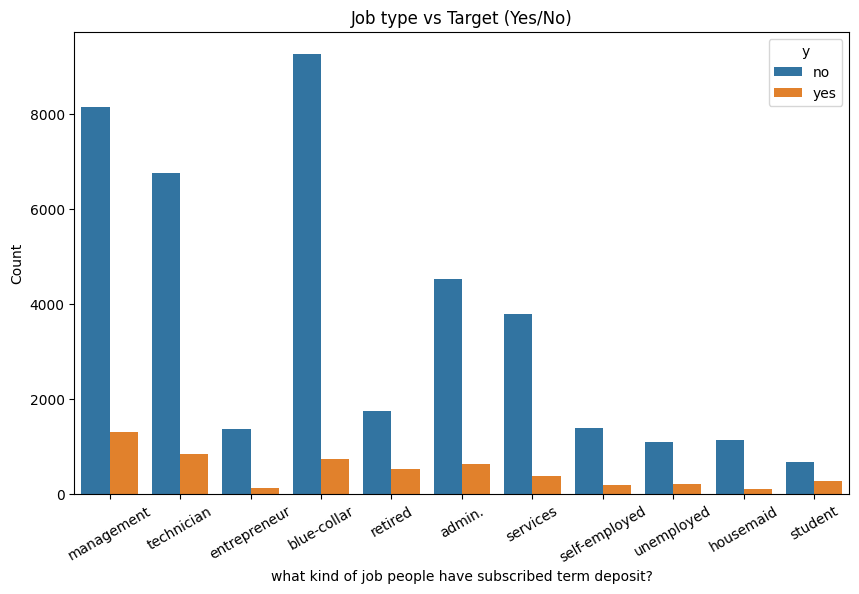

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (10,6))
plt.xticks(rotation = 30)
sns.countplot(x='job', hue='y', data=df)
plt.title("Job type vs Target (Yes/No)")
plt.xlabel("what kind of job people have subscribed term deposit?")
plt.ylabel("Count")
plt.show()

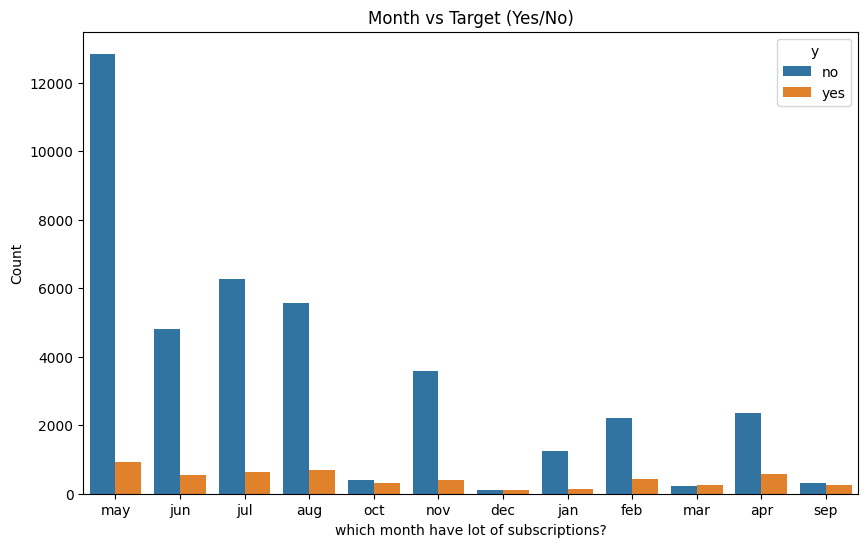

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (10,6))
sns.countplot(x='month', hue='y', data=df)
plt.title("Month vs Target (Yes/No)")
plt.xlabel("which month have lot of subscriptions?")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='duration'>

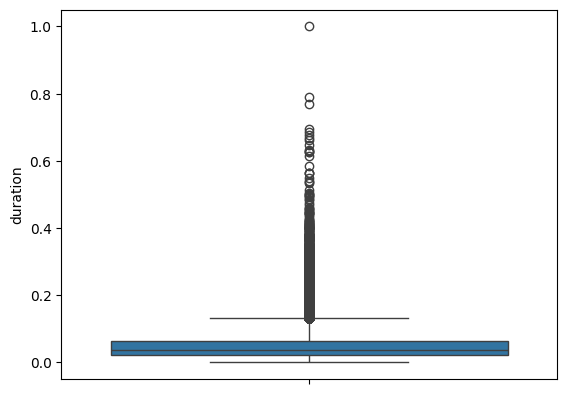

In [37]:
# Box Plot
import seaborn as sns
sns.boxplot(df['duration'])


In [36]:
import pandas as pd
import numpy as np

def detect_outliers_iqr(series):
    """
    Detect outliers in a Pandas Series using the IQR method.
    Returns a boolean mask where True indicates an outlier.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean mask for outliers
    return (series < lower_bound) | (series > upper_bound)

# Detect outliers
age_outlier_mask = detect_outliers_iqr(df['age'])
day_outlier_mask = detect_outliers_iqr(df['day'])
duration_outlier_mask = detect_outliers_iqr(df['duration'])
compaign_outlier_mask = detect_outliers_iqr(df['campaign'])
pdays_outlier_mask = detect_outliers_iqr(df['pdays'])
previous_outlier_mask = detect_outliers_iqr(df['previous'])
balance_outlier_mask = detect_outliers_iqr(df['balance'])


# Show only outliers
age_outliers = df['age'][age_outlier_mask]
day_outlier = df['day'][day_outlier_mask]
duration_outlier = df['duration'][duration_outlier_mask]
compaign_outlier = df['campaign'][compaign_outlier_mask]
pdays_outlier = df['pdays'][pdays_outlier_mask]
previous_outlier = df['previous'][previous_outlier_mask]
balance_outlier = df['balance'][balance_outlier_mask]

# Show results
print("age Outliers:\n", len(age_outliers))
print("day Outliers:\n", len(day_outlier))
print("duration Outliers:\n", len(duration_outlier))
print("compaign Outliers:\n", len(compaign_outlier))
print("pdays Outliers:\n", len(pdays_outlier))
print("prevoius Outliers:\n", len(previous_outlier))
print("balance Outliers:\n", len(balance_outlier))



age Outliers:
 487
day Outliers:
 0
duration Outliers:
 3235
compaign Outliers:
 3064
pdays Outliers:
 8257
prevoius Outliers:
 8257
balance Outliers:
 4731


In [6]:
df = df.drop(['pdays','campaign','previous'], axis = 1)

In [44]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

target = 'y'

categorical_features = df.select_dtypes(include='object').columns.drop(target)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


print("\n🔍 ANOVA Test (Numerical Features vs Categorical Target):")
for col in numerical_features:
    try:
        groups = [df[df[target] == cat][col].dropna() for cat in df[target].unique()]
        f_stat, p_val = f_oneway(*groups)
        print(f"{col}: p-value = {p_val:.4f}")
    except Exception as e:
        print(f"{col}: Error - {e}")


print("\n🔍 Chi-Square Test (Categorical Features vs Categorical Target):")
for col in categorical_features:
    try:
        contingency = pd.crosstab(df[col], df[target])
        chi2, p_val, _, _ = chi2_contingency(contingency)
        print(f"{col}: p-value = {p_val:.4f}")
    except Exception as e:
        print(f"{col}: Error - {e}")



🔍 ANOVA Test (Numerical Features vs Categorical Target):
age: p-value = 0.0000
balance: p-value = 0.0000
day: p-value = 0.0000
duration: p-value = 0.0000
campaign: p-value = 0.0000
previous: p-value = 0.0000

🔍 Chi-Square Test (Categorical Features vs Categorical Target):
job: p-value = 0.0000
marital: p-value = 0.0000
education: p-value = 0.0000
default: p-value = 0.0000
housing: p-value = 0.0000
loan: p-value = 0.0000
month: p-value = 0.0000


In [7]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,no


In [5]:
df['duration'].value_counts()

duration
124     188
90      184
89      177
104     175
114     175
       ... 
1286      1
1380      1
1723      1
2184      1
1233      1
Name: count, Length: 1573, dtype: int64

# Feature Engineering

pickling

In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler

age_scaler =  MinMaxScaler()
age_scaler.fit(df[['age']])

with open('age_scaler.pkl','wb') as f:
    pickle.dump(age_scaler , f)
print('saved')    

MinMaxScaler()

In [60]:
balance_scaler =  MinMaxScaler()
balance_scaler.fit(df[['balance']])

with open('balance_scaler.pkl','wb') as f:
    pickle.dump(balance_scaler , f)
print('saved')    

saved


In [ ]:
day_scaler =  MinMaxScaler()
day_scaler.fit(df[['day']]) 

with open('day_scaler.pkl','wb') as f:
    pickle.dump(day_scaler , f)
print('saved')   

MinMaxScaler()

In [63]:
duration_scaler =  MinMaxScaler()
duration_scaler.fit(df[['duration']]) 
print('fitted')

with open('duration_scaler.pkl','wb') as f:
    pickle.dump(duration_scaler, f)
print('saved')   

fitted
saved


In [69]:
df_edu = df['education']
df_mon = df['month']

In [67]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_edu = label_encoder.fit_transform(df_edu)

with open('education_lb.pkl','wb') as f:
    pickle.dump(label_encoder, f)

In [68]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_mon = label_encoder.fit_transform(df_mon)

with open('month_lb.pkl','wb') as f:
    pickle.dump(label_encoder, f)

In [8]:
df_y = df['y']


In [9]:
from sklearn import preprocessing
import joblib

label_encoder = preprocessing.LabelEncoder()
df_y = label_encoder.fit_transform(df_y)

# Save the trained label encoder
joblib.dump(label_encoder, "y_encoder.joblib")


['y_encoder.joblib']

Data preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def scale_columns_inplace(df, columns_to_scale):
    
    scaler = MinMaxScaler()
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return scaler

scaler = scale_columns_inplace(df, ['age','balance','day','duration'])
print(df)

            age           job   marital  education default   balance housing  \
0      0.519481    management   married   tertiary      no  0.092259     yes   
1      0.337662    technician    single  secondary      no  0.073067     yes   
2      0.194805  entrepreneur   married  secondary      no  0.072822     yes   
3      0.376623   blue-collar   married  secondary      no  0.086476     yes   
4      0.194805   blue-collar    single  secondary      no  0.072812      no   
...         ...           ...       ...        ...     ...       ...     ...   
45206  0.428571    technician   married   tertiary      no  0.080293      no   
45207  0.688312       retired  divorced    primary      no  0.088501      no   
45208  0.701299       retired   married  secondary      no  0.124689      no   
45209  0.506494   blue-collar   married  secondary      no  0.078868      no   
45210  0.246753  entrepreneur   married  secondary      no  0.099777      no   

      loan       day month  duration   

In [9]:
def one_hot(data,col):
    data = pd.get_dummies(data, columns=[col])
    return data

df = one_hot(df,'job')

df = one_hot(df,'marital')
df = one_hot(df,'default')
df = one_hot(df,'housing')
df = one_hot(df,'loan')


In [10]:
from sklearn import preprocessing

def label_encoding(y,col):

    label_encoder = preprocessing.LabelEncoder()
    y[col] = label_encoder.fit_transform(y[col])
    return y

label_encoding(df,'education')
label_encoding(df,'month')
label_encoding(df,'y')



,age,education,balance,day,month,duration,y,job_admin.,job_blue-collar,job_entrepreneur,...,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.519481,2,0.092259,0.133333,8,0.053070,0,False,False,False,...,False,False,True,False,True,False,False,True,True,False
1,0.337662,1,0.073067,0.133333,8,0.030704,0,False,False,False,...,False,False,False,True,True,False,False,True,True,False
2,0.194805,1,0.072822,0.133333,8,0.015453,0,False,False,True,...,False,False,True,False,True,False,False,True,False,True
3,0.376623,1,0.086476,0.133333,8,0.018707,0,False,True,False,...,False,False,True,False,True,False,False,True,True,False
4,0.194805,1,0.072812,0.133333,8,0.040260,0,False,True,False,...,False,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,2,0.080293,0.533333,9,0.198658,1,False,False,False,...,False,False,True,False,True,False,True,False,True,False
45207,0.688312,0,0.088501,0.533333,9,0.092721,1,False,False,False,...,False,True,False,False,True,False,True,False,True,False
45208,0.701299,1,0.124689,0.533333,9,0.229158,1,False,False,False,...,False,False,True,False,True,False,True,False,True,False
45209,0.506494,1,0.078868,0.533333,9,0.103294,0,False,True,False,...,False,False,True,False,True,False,True,False,True,False


# Model

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
X = df.drop('y',axis = 1)
y = df['y']

In [90]:
X.columns

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')

In [54]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (31647, 26)
y_train (31647,)
X_test (13564, 26)
y_test (13564,)


In [17]:
print(y_train.value_counts())
print(y_test.value_counts())

y
0    27945
1    27945
Name: count, dtype: int64
y
0    11977
1     1587
Name: count, dtype: int64


In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42, k_neighbors=5)
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [16]:
from imblearn.over_sampling import RandomOverSampler

# Create the sampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)


In [107]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Prediction
y_predicted = logistic_regression_model.predict(X_test)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
import numpy as np
accurancy = accuracy_score(y_test, y_predicted) * 100
precision = precision_score(y_test, y_predicted) * 100
recall = recall_score(y_test, y_predicted)
f1_score = f1_score(y_test, y_predicted)
print('accurancy', accurancy)
print('precision', precision )
print('recall', recall)

print('fi score', f1_score )

accurancy 79.01061633736362
precision 33.08046599837443
recall 0.7640801001251565
fi score 0.4617129892229155


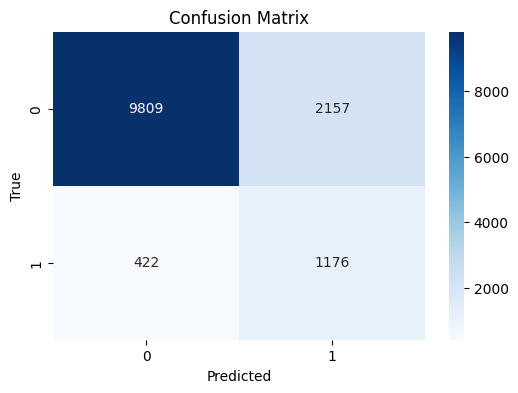

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()  


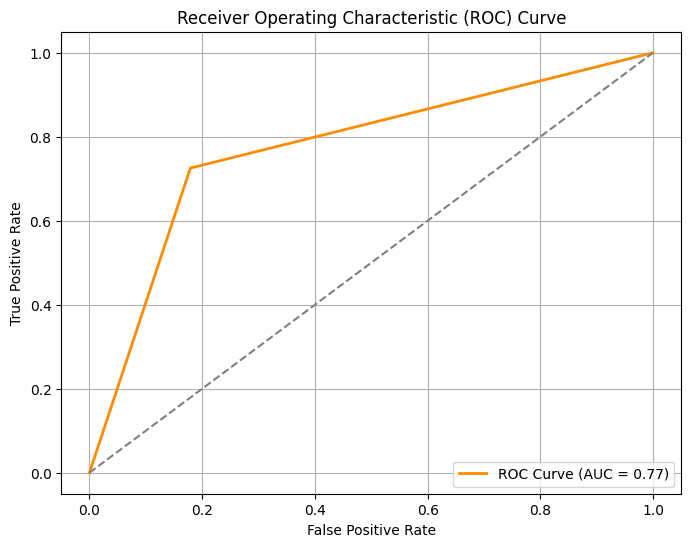

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

# 🎨 Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [109]:
from sklearn.tree import DecisionTreeClassifier
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred = clf.predict(X_test)


In [112]:
accuracy_ds = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred)
print('accurancy of ds', accuracy_ds)
print('precision', precision )
print('recall', recall)


accurancy of ds 0.8615452668829254
precision 41.0371318822023
recall 0.40112640801001254


In [26]:
from sklearn.metrics import f1_score

# Correct variable name
f1_score_value = f1_score(y_test, y_pred)

print("F1 Score:", f1_score_value)


F1 Score: 0.461245839277223


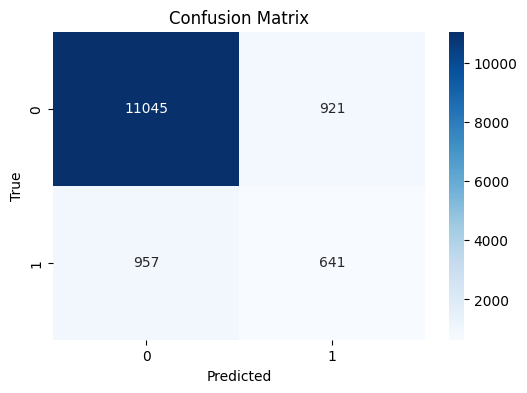

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()  


In [4]:
! pip install xgboost

In [18]:
import xgboost as xgb

In [19]:

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [150]:
import joblib

# Save your trained model
joblib.dump(model, "xgb_model.joblib")

['xgb_model.joblib']

In [20]:
# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred) * 100
recall_xgb = recall_score(y_test, y_pred)
print('accurancy of xgb', accuracy_xgb)
print('precision', precision_xgb )
print('recall', recall_xgb)

accurancy of xgb 0.8617664405780006
precision 44.66271312083025
recall 0.759294265910523


In [21]:
from sklearn.metrics import f1_score

# Correct variable name
f1_score_xgb = f1_score(y_test, y_pred)

print("F1 Score:", f1_score_xgb)


F1 Score: 0.5624270711785297


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
# plt.show()
plt.savefig('confusion_matrix.png')  # <-- Save the confusion matrix
plt.close()


In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 🎨 Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
# plt.show()
plt.savefig('roc_curve.png')  # <-- Save the ROC curve
plt.close()


In [44]:
import pickle
with open("XGBoost.pkl", "wb") as f:
    pickle.dump(model, f)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [121]:
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred) * 100
recall_rf = recall_score(y_test, y_pred)
print('accurancy ', accuracy_rf)
print('precision',  precision_rf)
print('recall', recall_rf)

accurancy  0.8920672368033029
precision 55.1617873651772
recall 0.44806007509386736


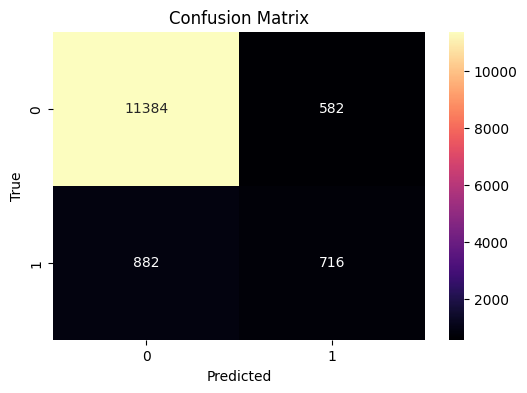

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()  


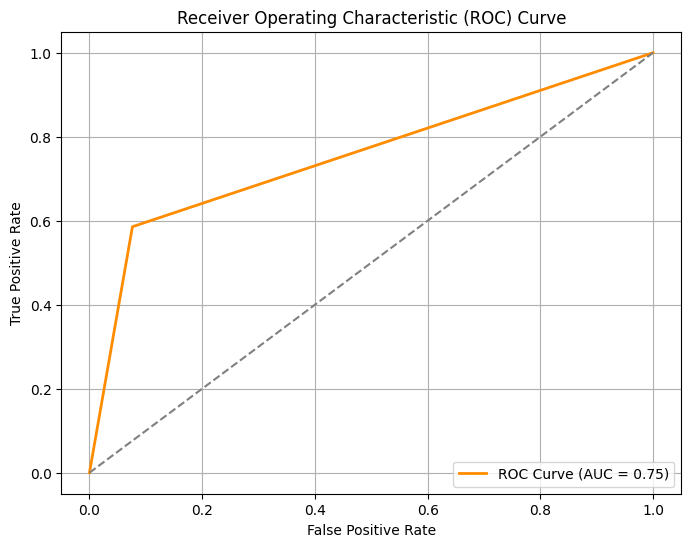

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 🎨 Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
